In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scipy as sp
from collections import defaultdict
from itertools import product
import gurobipy as gb
from gurobipy import GRB
from tqdm import tqdm
#8 - 125,11 - 126

In [2]:
def loop(From, l):
    l.append(From)
    if From == 0:
        return l
    to = np.where(x[From] == 1)
    return loop(to[0][0], l)

In [3]:
solution = json.load(open('./globalsoln.json'))

In [4]:


x = np.zeros((127,127))
Vars = solution['Vars']
for var in Vars:
    if var['VarName'].startswith('x'):
        indices = var['VarName'].split('[')
        indices = indices[1].split(']')[0]
        indices = indices.split(',')
        indices = int(indices[0]), int(indices[1])
        x[indices] = 1

loops = []
for zero_to in np.where(x[0]==1)[0]:
    Loop = map(
        lambda idx: range(127)[idx],
        loop(zero_to, [0])
    )
    loops.append(list(Loop))

In [5]:
locations = pd.read_json('../cleandata/locations.json')
longs = locations['long'].to_numpy()
lats = locations['lat'].to_numpy()
longs_lats_in_one = np.array([*zip(longs[:125],lats[:125])])
def get_loc(i):
    if i == 125:
        i = 8
    elif i == 126:
        i = 11
    return longs_lats_in_one[i]

Text(0.5, 1.0, 'Loops in (estimated) global solution (loop count = 47)')

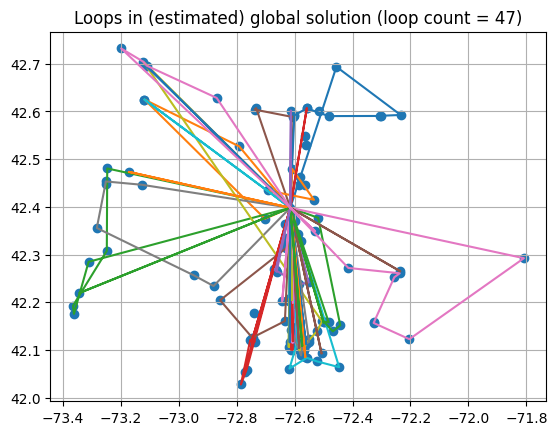

In [6]:
for loop in loops:
    '''paths = []
    for i in range(0,len(loop) - 1):
        paths.append((loop[i], loop[i+1]))'''
    locs = list(map(lambda loc:get_loc(loc)[0], loop)), list(map(lambda loc:get_loc(loc)[1], loop))
    plt.plot(locs[0], locs[1])
plt.grid()
plt.scatter(longs, lats)
plt.title('Loops in (estimated) global solution (loop count = 47)')

In [7]:
len(loops)

47